In [8]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../../") # go to parent dir

from ipywidgets import interact, interact_manual, widgets
import matplotlib.pyplot as plt
from viz_utils import *
import seaborn as sns
clear_cache()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 11/2021 Exploratory Fixed_3k

- Review the finished experiments that are in the refactored, materialized table.
- Create an array of visualizations to inspect the quality of the results.
  - Are we collecting the data we think we're collecting?
  - Do any experiments need to be re-run?
- Re-create visualizations from aspect-test using fixed-3k data

## Data Quality and Completeness

Histograms of the data collected so far indicate that that fixed_3k experiment has run to 30 iterations per group 

In [9]:
query_string = f'''
SELECT  budget,
        "group",
        dataset,
        learning_rate,
        label_noise,
        topology,
        residual_mode,
        depth,
        count(*) as count
FROM materialized_experiments_3_base
WHERE "group" in ({string_to_id("fixed_3k_0")},{string_to_id("fixed_3k_1")})
GROUP BY budget,
        "group",
        dataset,
        learning_rate,
        label_noise,
        topology,
        residual_mode,
        depth
'''
df = cached_query(query_string)

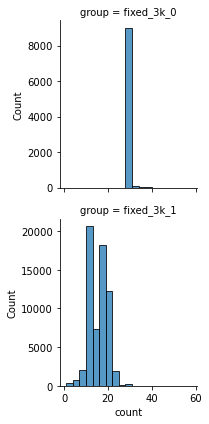

In [10]:
g = sns.FacetGrid(df, row="group", sharey=False)
g.map(sns.histplot, "count", binwidth=3)

In [11]:
print("Fixed_3k_0")
df.query("group=='fixed_3k_0'")[["dataset", "learning_rate", "label_noise", "residual_mode"]].drop_duplicates()

Fixed_3k_0


,dataset,learning_rate,label_noise,residual_mode
0,201_pol,0.001,0.0,none
13,201_pol,0.001,0.0,full
78,529_pollen,0.001,0.0,none
91,529_pollen,0.001,0.0,full
151,wine_quality_white,0.001,0.0,none
164,wine_quality_white,0.001,0.0,full
229,537_houses,0.001,0.0,none
242,537_houses,0.001,0.0,full
303,connect_4,0.001,0.0,none
316,connect_4,0.001,0.0,full


In [12]:
print("Fixed_3k_1")
display(df.query("group=='fixed_3k_1'")[["dataset", "learning_rate", "label_noise", "residual_mode"]].drop_duplicates())

Fixed_3k_1


,dataset,learning_rate,label_noise,residual_mode
537,201_pol,0.0001,0.00,none
602,201_pol,0.0001,0.05,none
667,201_pol,0.0001,0.10,none
732,201_pol,0.0001,0.15,none
797,201_pol,0.0001,0.20,none
862,201_pol,0.0010,0.00,none
927,201_pol,0.0010,0.05,none
992,529_pollen,0.0001,0.00,none
1057,529_pollen,0.0001,0.05,none
1122,529_pollen,0.0001,0.10,none


We see that fixed_3k_0 has largely completed, whereas fixed_3k_1 has many combinations of parameters which have only completed 10-15 iterations.

```
fixed_3k_0 = {
    "dataset":["201_pol", "529_pollen", "wine_quality_white", "537_houses", "connect_4", "mnist", "sleep"],
    "label_noise": 0.0,
    "learning_rate": 0.001,
    "residual_mode": [none, full]
}
```

```
fixed_3k_1 = {
    "dataset":["201_pol", "529_pollen", "wine_quality_white", "537_houses", "connect_4", "mnist", "sleep"],
    "label_noise": [0, 0.05, 0.1, 0.13, 0.2],
    "learning_rate": [0.0001, 0.001],
    "residual_mode": none
}
```



### Progress of fixed_3k_1

In [9]:
data = df[df["group"] == "fixed_3k_1"].groupby(["depth","dataset"]).sum()["count"].unstack()

px.imshow(data,
         title="fixed_3k_1 counts")

In [31]:
data = df[df["group"] == "fixed_3k_1"].groupby(["topology","label_noise"]).sum()["count"].unstack()

px.imshow(data,
         title="fixed_3k_1 counts")

In [11]:
data = df[df["group"] == "fixed_3k_1"].groupby(["dataset","label_noise"]).sum()["count"].unstack()

px.imshow(data,
         title="fixed_3k_1 counts")

In [56]:
data = df[df["group"] == "fixed_3k_1"].groupby(["dataset","learning_rate"]).sum()["count"].unstack()

px.imshow(data,
         title="fixed_3k_1 counts")

In [57]:
print("fixed_3k_1")
df[df["group"] == "fixed_3k_1"].groupby(["label_noise","learning_rate"]).sum()["count"].unstack()


fixed_3k_1


learning_rate,0.0001,0.0010
label_noise,,
0.00,158725.0,90106.0
0.05,158452.0,90023.0
0.10,147681.0,NaN
0.15,147416.0,NaN
0.20,147287.0,NaN


In [13]:
df[(df["group"] == "fixed_3k_1")&(df["count"] < 5)].to_csv("less_than_5_runs.csv", index=False)

In [14]:
df[(df["group"] == "fixed_3k_1")&(df["count"] < 5)].count()

budget           523
group            523
dataset          523
learning_rate    523
label_noise      523
topology         523
residual_mode    523
depth            523
count            523
dtype: int64

## Exploratory Analysis of Fixed_3k_0 Results

In [74]:
### Heapmap App using Imshow
def heatmap_app(
    group='fixed_3k_1',
    learning_rate=0.0001,
    label_noise = 0.0,
    dataset="201_pol", 
    topology="trapezoid", 
    residual_mode="none",
    loss="val_loss", 
    agg="avg",
    viz="effort", 
    depths=(2,20),
    color_range=1.3):
    history_table = 'materialized_experiments_3_val_loss' if loss == 'val_loss' else \
        'materialized_experiments_3_history'
    query_string = f'''
    select budget, {agg}(a.val) as value, count(a.val) as count, a.epoch
    from
        materialized_experiments_3_base base,
        {history_table} history,
        unnest(history.{loss}) WITH ORDINALITY as a(val, epoch)
    WHERE
        base.id = history.id and
        "group" = {string_to_id(group)} and
        dataset = {string_to_id(dataset)} and
        learning_rate = {learning_rate}::real and
        label_noise = {label_noise}::real and
        topology = {string_to_id(topology)} and
        residual_mode = {string_to_id(residual_mode)} and
        depth BETWEEN {depths[0]} and {depths[1]}
    GROUP BY budget, epoch
    ORDER BY budget, epoch;
    '''
    print('Querying...')
    df = cached_query(query_string)
    print(f'{len(df)} rows returned')
    
    return make_2d_heatmap_viz(df, group, dataset, topology, loss, agg, residual_mode, viz, color_range)

fig = heatmap_app(group='fixed_3k_0',
    learning_rate=0.001,
    label_noise = 0.0,
    dataset="201_pol", 
    topology="trapezoid", 
    residual_mode="none",
    loss="val_loss", 
    agg="avg",
    viz="effort", 
    depths=(2,20),
    color_range=1.3)
fig.show()

Querying...
54018 rows returned
interpolated (18, 4000)


```
fixed_3k_0 = {
    "dataset":["201_pol", "529_pollen", "wine_quality_white", "537_houses", "connect_4", "mnist", "sleep"],
    "label_noise": 0.0,
    "learning_rate": 0.001,
    "residual_mode": [none, full]
}
```

```
fixed_3k_1 = {
    "dataset":["201_pol", "529_pollen", "wine_quality_white", "537_houses", "connect_4", "mnist", "sleep"],
    "label_noise": [0, 0.05, 0.1, 0.13, 0.2],
    "learning_rate": [0.0001, 0.001],
    "residual_mode": none
}
```